## 2D Dataset

In [2]:
import numpy as np
from sklearn.base import clone
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def plotDataset(X, y):
  for label in np.unique(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], label=label)
  plt.legend()
  plt.show()

def plotEstimator(trX, trY, teX, teY, estimator, title='',Z=None):
  estimator = clone(estimator).fit(trX, trY)
  h = .02
  x_min, x_max = teX[:, 0].min() - .5, teX[:, 0].max() + .5
  y_min, y_max = teX[:, 1].min() - .5, teX[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  if Z is None:
      Z = estimator.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
  plt.scatter(teX[:, 0], teX[:, 1], c=teY, cmap=cm_bright, edgecolors='k', alpha=0.6)
  # plt.legend()
  plt.title(title)
  plt.show()

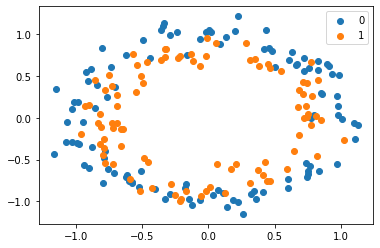

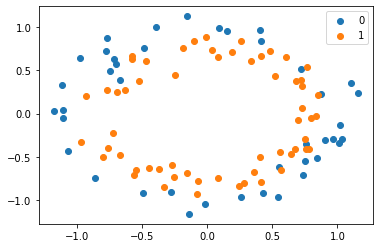

In [3]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

rs = 0
X, y = make_circles(300, noise=0.1, random_state=rs)
trX, teX, trY, teY = train_test_split(X, y, test_size=0.33,
random_state=rs)

plotDataset(trX, trY)
plotDataset(teX, teY)

### **Decision Tree**

The Accuracy =  0.6060606060606061


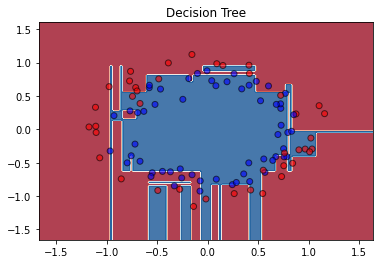

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


estimator = DecisionTreeClassifier(random_state=rs)
estimator.fit(trX, trY)
predY = estimator.predict(teX)
dtAccuracy = accuracy_score(teY, predY)
print("The Accuracy = ",dtAccuracy)
plotEstimator(trX, trY, teX, teY, estimator, 'Decision Tree')

### Bagging

The Accuracy =  0.6363636363636364


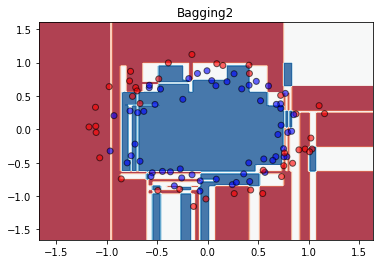

The Accuracy =  0.7373737373737373


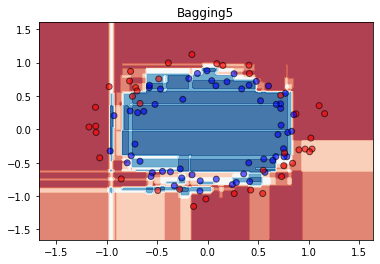

The Accuracy =  0.7474747474747475


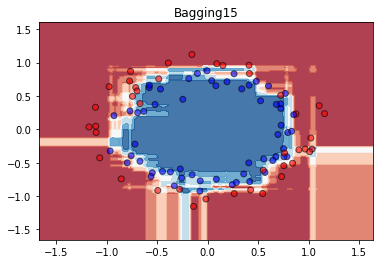

The Accuracy =  0.7575757575757576


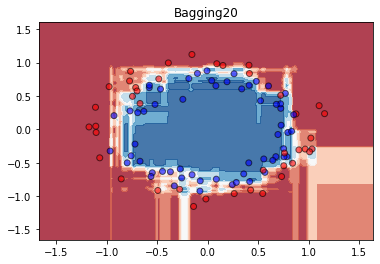

In [5]:
from sklearn.ensemble import VotingClassifier
from sklearn.utils import resample
import numpy as np 
import random
import pandas as pd

num_estimator = [2,5,15,20]
# bsX = random.choices(trX, k = len(trX))
# bsY = random.choices(trY, k = len(trY))
# bsX, bsY = resample(trX, trY, random_state=rs)
# print(bsX)
h = .02
x_min, x_max = teX[:, 0].min() - .5, teX[:, 0].max() + .5
y_min, y_max = teX[:, 1].min() - .5, teX[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
for i in num_estimator:
    df_prediction = pd.DataFrame()
    Z=pd.DataFrame()
    for n in range(i):
        idx = random.choices(range(len(trX)), k = len(trX))
        bsX=trX[idx]
        bsY=trY[idx]
        est =  DecisionTreeClassifier(random_state=rs)
        clf = est.fit(list(bsX), list(bsY))
        predY = clf.predict(teX)
        Z[str(n)] = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        df_prediction['M'+str(n)] = predY
    df_prediction['FinalPredict'] = df_prediction.mode(axis=1)[0]
    Z['vote']=Z.mean(axis=1)

    dtAccuracy = accuracy_score(teY, df_prediction['FinalPredict'])
    print("The Accuracy = ",dtAccuracy)
    plotEstimator(trX, trY, teX, teY, est,'Bagging'+str(i),np.array(Z['vote']))

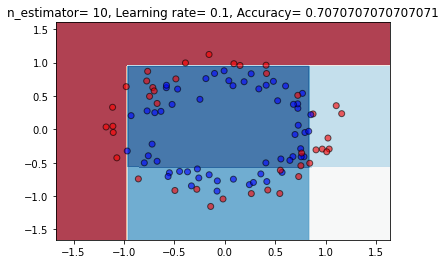

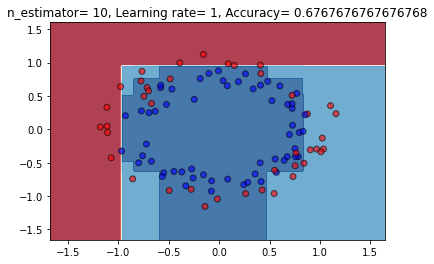

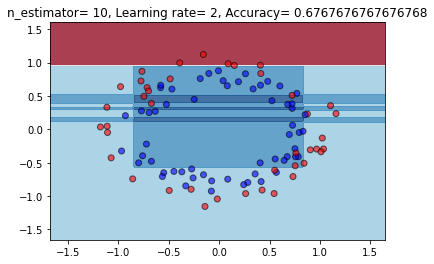

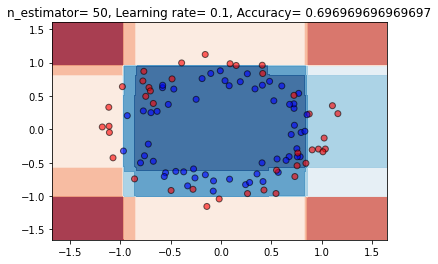

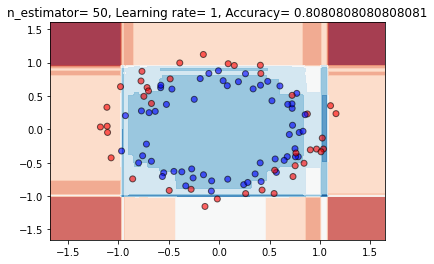

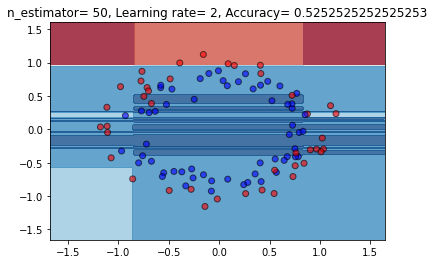

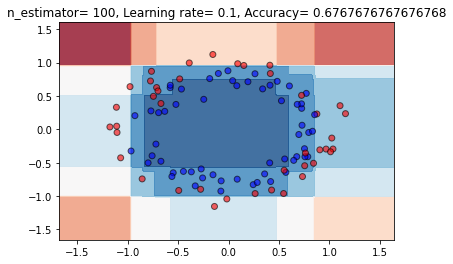

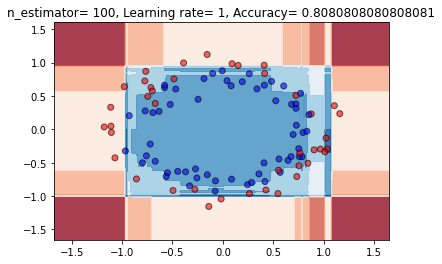

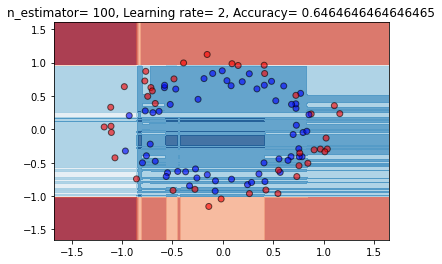

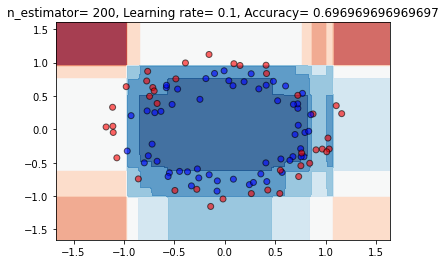

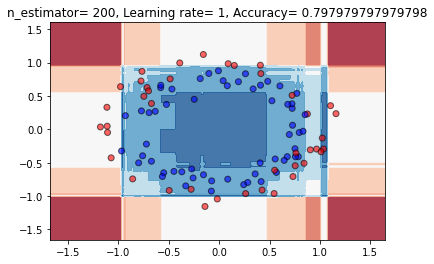

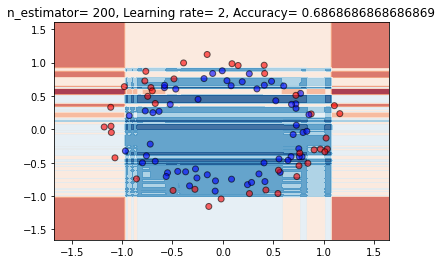

In [6]:
from sklearn.ensemble import AdaBoostClassifier

hyper = [
        [10,.1],
        [10,1],
        [10,2],
        
        [50,.1],
        [50,1],
        [50,2],
         
        [100,.1],
        [100,1],
        [100,2],
        
        [200,0.1],
        [200,1],
        [200,2]
         
        ]

for pair in hyper:
    clf = AdaBoostClassifier(n_estimators=pair[0], learning_rate=pair[1], random_state=0)
    clf.fit(trX, trY)
    score = clf.fit(trX, trY).score(teX, teY)
    title = "n_estimator= " +str(pair[0])+", " +"Learning rate= " + str(pair[1]) +", " + "Accuracy= "+ str(score)

    plotEstimator(trX, trY, teX, teY, clf, title)